# Digital Musicology Project: Statistical Analysis

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [185]:
data00 = pd.read_csv("output.csv", sep=',', index_col=0)
data01= pd.read_csv("output2.csv", sep=',', index_col=0)
data=data00.join(data01)
data01

,Mother tongue,NoLyricsLike,ForeignLike,FamiliarLike,ActiveEngagement,PerceptualAbilities,MusicalTraining,SingingAbilities,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Timestamp,,,,,,,,,,,,,,,
0,French,1,1,1,51,52,29,12,41,67,79,92,79,76,66
1,French,6,4,4,56,58,45,41,33,111,44,38,85,42,79
2,Spanish,4,1,7,37,43,24,31,31,79,34,79,85,69,24
3,Persian,2,1,5,36,53,27,42,27,86,62,85,66,76,50
4,Spanish,5,7,3,45,38,18,32,39,83,73,95,79,60,79
5,French,5,3,5,50,53,25,26,35,71,46,73,66,52,85
6,French,4,5,3,46,55,34,32,36,91,28,73,73,85,16
7,French,2,5,6,51,54,39,32,37,96,52,24,79,60,16
8,French,5,4,5,55,55,40,35,41,102,66,34,88,85,52


In [4]:
data.shape

(30, 35)

In [186]:
data['NOL'] = data.apply(lambda row: (row.NOL1 + row.NOL2+ row.NOL3)/3, axis=1)
data['FAM'] = data.apply(lambda row: (row.FAM1 + row.FAM2+ row.FAM3)/3, axis=1)
data['FOR'] = data.apply(lambda row: (row.FOR1 + row.FOR2+ row.FOR3)/3, axis=1)
data.head()

,FAM1,FAM2,FAM3,FOR1,FOR2,FOR3,NOL1,NOL2,NOL3,NOMUSIC,...,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,NOL,FAM,FOR
Timestamp,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,7.0,4.0,7.0,5.0,4.0,4.0,6.0,3.0,...,41,67,79,92,79,76,66,4.666667,4.333333,5.333333
1,6.0,2.0,1.0,3.0,4.0,4.0,1.0,5.0,5.0,7.0,...,33,111,44,38,85,42,79,3.666667,3.000000,3.666667
2,8.0,6.0,5.0,4.0,2.0,5.0,4.0,3.0,5.0,8.0,...,31,79,34,79,85,69,24,4.000000,6.333333,3.666667
3,8.0,4.0,10.0,6.0,7.0,7.0,5.0,4.0,3.0,6.0,...,27,86,62,85,66,76,50,4.000000,7.333333,6.666667
4,7.0,6.0,2.0,6.0,6.0,4.0,6.0,4.0,7.0,5.0,...,39,83,73,95,79,60,79,5.666667,5.000000,5.333333


In [187]:
data['pNOL'] = data.apply(lambda row: (row.NOL/(row.NOL + row.FAM+ row.FOR)), axis=1)
data['pFAM'] = data.apply(lambda row: (row.FAM/(row.NOL + row.FAM+ row.FOR)), axis=1)
data['pFOR'] = data.apply(lambda row: (row.FOR/(row.NOL + row.FAM+ row.FOR)), axis=1)
data

,FAM1,FAM2,FAM3,FOR1,FOR2,FOR3,NOL1,NOL2,NOL3,NOMUSIC,...,Conscientiousness,Extraversion,Agreeableness,Neuroticism,NOL,FAM,FOR,pNOL,pFAM,pFOR
Timestamp,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,7.0,4.0,7.0,5.0,4.0,4.0,6.0,3.0,...,92,79,76,66,4.666667,4.333333,5.333333,0.325581,0.302326,0.372093
1,6.0,2.0,1.0,3.0,4.0,4.0,1.0,5.0,5.0,7.0,...,38,85,42,79,3.666667,3.000000,3.666667,0.354839,0.290323,0.354839
2,8.0,6.0,5.0,4.0,2.0,5.0,4.0,3.0,5.0,8.0,...,79,85,69,24,4.000000,6.333333,3.666667,0.285714,0.452381,0.261905
3,8.0,4.0,10.0,6.0,7.0,7.0,5.0,4.0,3.0,6.0,...,85,66,76,50,4.000000,7.333333,6.666667,0.222222,0.407407,0.370370
4,7.0,6.0,2.0,6.0,6.0,4.0,6.0,4.0,7.0,5.0,...,95,79,60,79,5.666667,5.000000,5.333333,0.354167,0.312500,0.333333
5,4.0,4.0,2.0,5.0,8.0,3.0,6.0,6.0,1.0,4.0,...,73,66,52,85,4.333333,3.333333,5.333333,0.333333,0.256410,0.410256
6,2.0,4.0,1.0,4.0,0.0,1.0,2.0,1.0,1.0,3.0,...,73,73,85,16,1.333333,2.333333,1.666667,0.250000,0.437500,0.312500
7,2.0,0.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,4.0,...,24,79,60,16,1.666667,1.000000,1.666667,0.384615,0.230769,0.384615
8,7.0,5.0,4.0,3.0,6.0,2.0,6.0,2.0,5.0,5.0,...,34,88,85,52,4.333333,5.333333,3.666667,0.325000,0.400000,0.275000


## Part 0: Dependence task performance and music background style

In [188]:
from scipy import stats
stats.kruskal(data['pNOL'], data['pFAM'], data['pFOR'])

KruskalResult(statistic=2.9227471710127033, pvalue=0.23191749733286773)

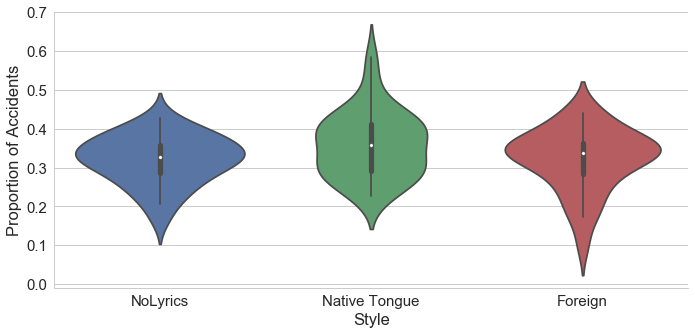

In [200]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Proportion of Accidents'])
prop_Accidents
data['No Lyrics']='NoLyrics'
data['Native Tongue']='Native Tongue'
data['Foreign']='Foreign'
style_Song = pd.concat((data['No Lyrics'], data['Native Tongue'], data['Foreign']), axis=0)
style_Song = pd.DataFrame(style_Song, columns=['Style'])
data_styles = pd.concat((prop_Accidents,style_Song), axis=1)
data_styles = pd.DataFrame(data_styles)
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.factorplot(
    x      = 'Style',
    y      = 'Proportion of Accidents',
    data   = data_styles,
    kind   = "violin",
    size   = 5,
    aspect = 2
)
plt.savefig('data_styles')

In [201]:
dataSPA = data.loc[data["Mother tongue"] == "Spanish"]
stats.kruskal(dataSPA['pNOL'], dataSPA['pFAM'], dataSPA['pFOR'])

KruskalResult(statistic=6.209115221751731, pvalue=0.04484435282568045)

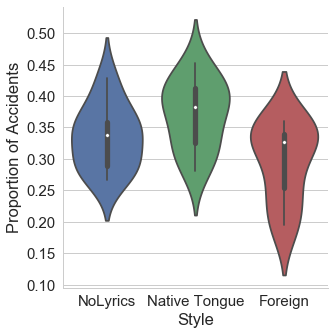

In [203]:
prop_Accidents = pd.concat((dataSPA['pNOL'], dataSPA['pFAM'],dataSPA['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Proportion of Accidents'])
prop_Accidents
style_Song = pd.concat((dataSPA['No Lyrics'], dataSPA['Native Tongue'], dataSPA['Foreign']), axis=0)
style_Song = pd.DataFrame(style_Song, columns=['Style'])
dataSPA_styles = pd.concat((prop_Accidents,style_Song), axis=1)
dataSPA_styles = pd.DataFrame(dataSPA_styles)

sns.factorplot(
    x      = 'Style',
    y      = 'Proportion of Accidents',
    data   = dataSPA_styles,
    kind   = "violin",
    size   = 5,
    aspect = 1
)
plt.savefig('dataSPA_styles')

In [204]:
dataPER = data.loc[data["Mother tongue"] == "Persian"]
stats.kruskal(dataPER['pNOL'], dataPER['pFAM'], dataPER['pFOR'])

KruskalResult(statistic=1.288315156910744, pvalue=0.5251047153577094)

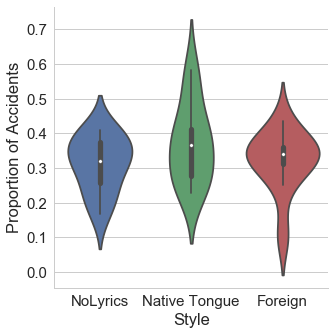

In [206]:
prop_Accidents = pd.concat((dataPER['pNOL'], dataPER['pFAM'],dataPER['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Proportion of Accidents'])
prop_Accidents
style_Song = pd.concat((dataPER['No Lyrics'], dataPER['Native Tongue'], dataPER['Foreign']), axis=0)
style_Song = pd.DataFrame(style_Song, columns=['Style'])
dataPER_styles = pd.concat((prop_Accidents,style_Song), axis=1)
dataPER_styles = pd.DataFrame(dataPER_styles)

sns.factorplot(
    x      = 'Style',
    y      = 'Proportion of Accidents',
    data   = dataPER_styles,
    kind   = "violin",
    size   = 5,
    aspect = 1
)
plt.savefig('dataPER_styles')

In [207]:
dataFRE = data.loc[data["Mother tongue"] == "French"]
stats.kruskal(dataFRE['pNOL'], dataFRE['pFAM'], dataFRE['pFOR'])

KruskalResult(statistic=1.755365093499551, pvalue=0.41574526636368747)

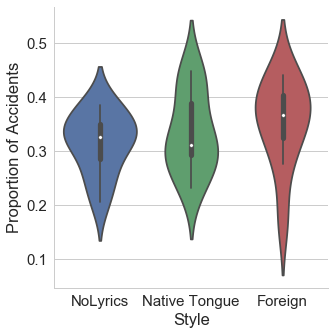

In [209]:
prop_Accidents = pd.concat((dataFRE['pNOL'], dataFRE['pFAM'],dataFRE['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Proportion of Accidents'])
prop_Accidents
style_Song = pd.concat((dataFRE['No Lyrics'], dataFRE['Native Tongue'], dataFRE['Foreign']), axis=0)
style_Song = pd.DataFrame(style_Song, columns=['Style'])
dataFRE_styles = pd.concat((prop_Accidents,style_Song), axis=1)
dataFRE_styles = pd.DataFrame(dataFRE_styles)

sns.factorplot(
    x      = 'Style',
    y      = 'Proportion of Accidents',
    data   = dataFRE_styles,
    kind   = "violin",
    size   = 5,
    aspect = 1
)
plt.savefig('dataFRE_styles')

## Part 1: Music like/dislike score

In [210]:
music_valenceNOL = pd.concat((data['NoLyricsLike'],data['pNOL']), axis=1)
music_valenceNOL
music_valenceNOL.corr(method='spearman', min_periods=1)

,NoLyricsLike,pNOL
NoLyricsLike,1.000000,-0.062671
pNOL,-0.062671,1.000000


In [211]:
music_valenceFAM = pd.concat((data['FamiliarLike'],data['pFAM']), axis=1)
music_valenceFAM
music_valenceFAM.corr(method='spearman', min_periods=1)

,FamiliarLike,pFAM
FamiliarLike,1.00000,0.32583
pFAM,0.32583,1.00000


In [212]:
music_valenceFOR = pd.concat((data['ForeignLike'],data['pFOR']), axis=1)
music_valenceFOR
music_valenceFOR.corr(method='spearman', min_periods=1)

,ForeignLike,pFOR
ForeignLike,1.000000,-0.025902
pFOR,-0.025902,1.000000


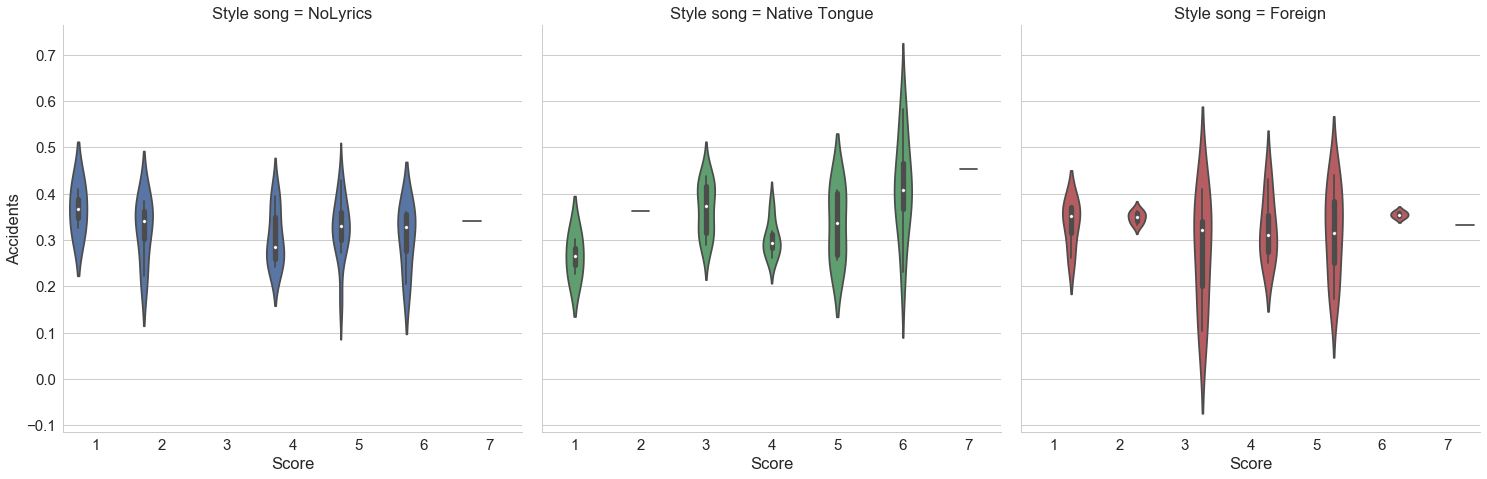

In [215]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
like_Song = pd.concat((data['NoLyricsLike'], data['FamiliarLike'], data['ForeignLike']), axis=0)
like_Song = pd.DataFrame(like_Song, columns=['Score'])
music_valence1 = pd.concat((prop_Accidents,like_Song), axis=1)
style_Song = pd.concat((data['No Lyrics'], data['Native Tongue'], data['Foreign']), axis=0)
style_Song = pd.DataFrame(style_Song, columns=['Style song'])
music_valence01 = pd.concat((music_valence1,style_Song), axis=1)
music_valence01

sns.factorplot(
    x      = 'Score',
    y      = 'Accidents',
    data   = music_valence01,
    hue    = 'Style song',
    kind   = "violin",
    col ='Style song',
    size   = 7,
    aspect = 1
)
plt.savefig('Valence_Accidents_byStyle.pdf')

In [216]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
like_Song = pd.concat((data['NoLyricsLike'], data['FamiliarLike'], data['ForeignLike']), axis=0)
like_Song = pd.DataFrame(like_Song, columns=['Score'])
language = pd.concat((data['Mother tongue'],data['Mother tongue'],data['Mother tongue']), axis=0)
language = pd.DataFrame(language, columns=['Mother tongue'])
music_valenceTongue = pd.concat((prop_Accidents,like_Song,language), axis=1)
music_valenceTongue = pd.DataFrame(music_valenceTongue)

In [217]:
music_valenceSPA = music_valenceTongue.loc[music_valenceTongue["Mother tongue"] == "Spanish"]
music_valenceSPA.corr(method='spearman', min_periods=1)

,Accidents,Score
Accidents,1.000000,0.299313
Score,0.299313,1.000000


In [218]:
music_valenceFRE = music_valenceTongue.loc[music_valenceTongue["Mother tongue"] == "French"]
music_valenceFRE.corr(method='spearman', min_periods=1)

,Accidents,Score
Accidents,1.000000,-0.127962
Score,-0.127962,1.000000


In [219]:
music_valencePER = music_valenceTongue.loc[music_valenceTongue["Mother tongue"] == "Persian"]
music_valencePER.corr(method='spearman', min_periods=1)

,Accidents,Score
Accidents,1.000000,0.178036
Score,0.178036,1.000000


In [221]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
like_Song = pd.concat((data['NoLyricsLike'], data['FamiliarLike'], data['ForeignLike']), axis=0)
like_Song = pd.DataFrame(like_Song, columns=['Score'])
music_valence1 = pd.concat((prop_Accidents,like_Song), axis=1)
music_valence1
music_valence1.corr(method='pearson', min_periods=1)

,Accidents,Score
Accidents,1.000000,0.128391
Score,0.128391,1.000000


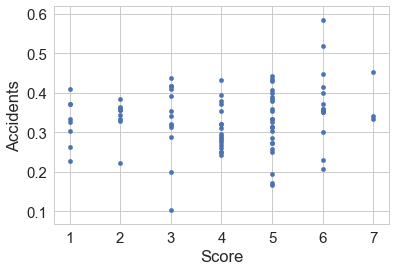

In [222]:
scatterplot_propAccidents = music_valence1.plot.scatter(x='Score', y='Accidents')
scatterplot_propAccidents.get_figure().savefig('Valence_Accidents.jpg', format='jpg')

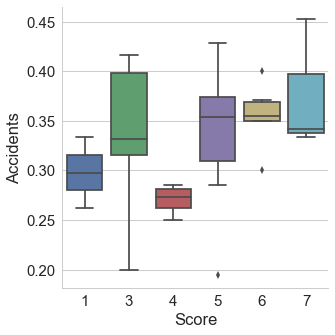

In [223]:
sns.factorplot(
    x      = 'Score',
    y      = 'Accidents',
    data   = music_valenceSPA,
    kind   = "box",
    size   = 5,
    aspect = 1
)
plt.savefig('Valence_propAccidents_SPA.pdf')

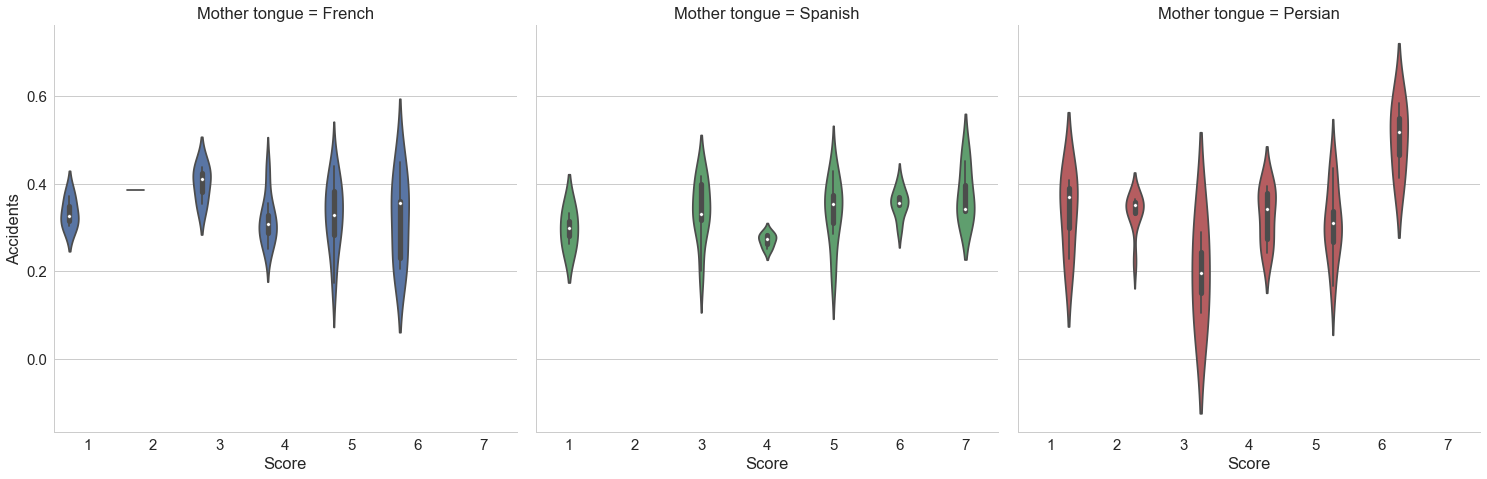

In [224]:
language = pd.concat((data['Mother tongue'],data['Mother tongue'],data['Mother tongue']), axis=0)
language = pd.DataFrame(language, columns=['Mother tongue'])
music_valence01 = pd.concat((music_valence1,language), axis=1)
music_valence01
sns.factorplot(
    x      = 'Score',
    y      = 'Accidents',
    data   = music_valence01,
    hue    = 'Mother tongue',
    kind   = "violin",
    col ='Mother tongue',
    size   = 7,
    aspect = 1
)
plt.savefig('Valence_Accidents_byLanguage.pdf')

In [226]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
like_Song = pd.concat((data['NoLyricsLike'], data['FamiliarLike'], data['ForeignLike']), axis=0)
like_Song = pd.DataFrame(like_Song, columns=['Score'])
music_valence2 = pd.concat((prop_Accidents,like_Song), axis=1)
music_valence2
music_valence2.corr(method='spearman', min_periods=1)

,Accidents,Score
Accidents,1.000000,0.110539
Score,0.110539,1.000000


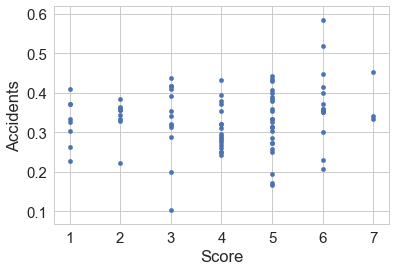

In [228]:
music_valence2=pd.concat((prop_Accidents,like_Song), axis=1)
music_valence2
scatterplot_propAccidents = music_valence2.plot.scatter(x='Score', y='Accidents')

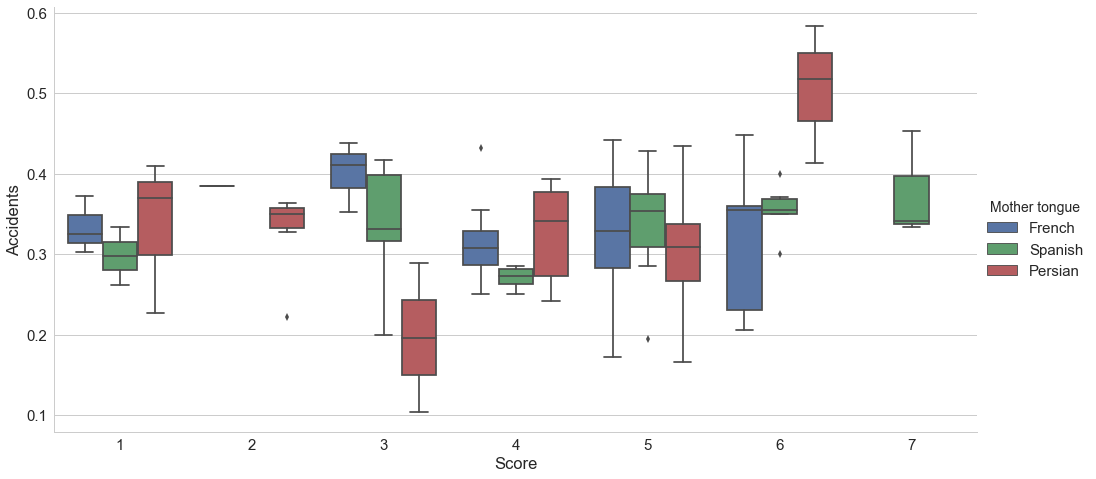

In [230]:
language = pd.concat((data['Mother tongue'],data['Mother tongue'],data['Mother tongue']), axis=0)
language = pd.DataFrame(language, columns=['Mother tongue'])
music_valence02 = pd.concat((music_valence2,language), axis=1)
sns.factorplot(
    x      = 'Score',
    y      = 'Accidents',
    data   = music_valence02,
    hue    = 'Mother tongue',
    kind   = "box",
    size   = 7,
    aspect = 2
)
plt.show()

## Part 2: Effect of personality in music impact on task performance

In [231]:
data['TOTAL'] = data.apply(lambda row: (row.NOL + row.FAM+ row.FOR), axis=1)

In [232]:
conditions = [
                  (data['Extraversion'] >= 50),
                  (data['Extraversion'] < 50)
]
choices = ['Extroverts','Introverts']
data['ExtraversionLevel'] = np.select(conditions, choices, default=None)
data['ExtraversionLevel'].value_counts()

Extroverts    22
Introverts     8
Name: ExtraversionLevel, dtype: int64

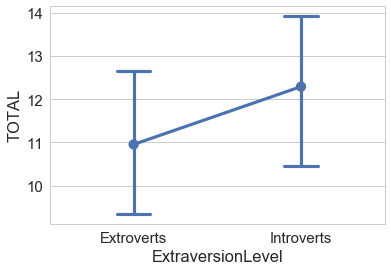

In [233]:
 sns.pointplot(x="ExtraversionLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_Accidents.pdf')

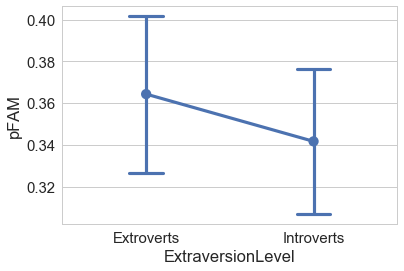

In [234]:
 sns.pointplot(x="ExtraversionLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_propAccidents_Familiar.pdf')

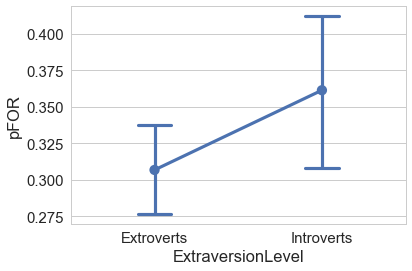

In [235]:
 sns.pointplot(x="ExtraversionLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_propAccidents_Foreign.pdf')

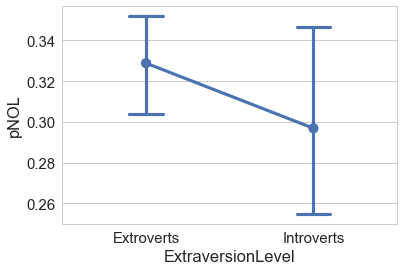

In [236]:
 sns.pointplot(x="ExtraversionLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_propAccidents_NoLyrics.pdf')

In [237]:
conditions = [
                  (data['Openness'] >= 50),
                  (data['Openness'] < 50)
]
choices = ['Liberal','Traditional']
data['OpennessLevel'] = np.select(conditions, choices, default=None)
data['OpennessLevel'].value_counts()

Liberal        18
Traditional    12
Name: OpennessLevel, dtype: int64

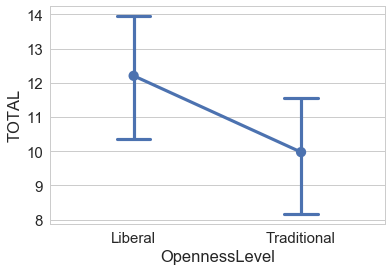

In [238]:
 sns.pointplot(x="OpennessLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_Accidents.pdf')

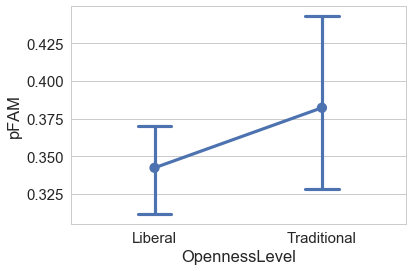

In [239]:
 sns.pointplot(x="OpennessLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_propAccidents_Familiar.pdf')

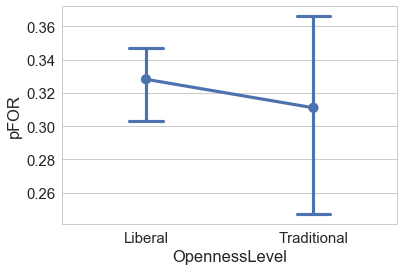

In [240]:
 sns.pointplot(x="OpennessLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_propAccidents_Foreign.pdf')

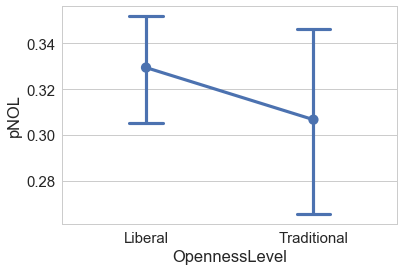

In [241]:
 sns.pointplot(x="OpennessLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_propAccidents_NoLyrics.pdf')

In [242]:
conditions = [
                  (data['Conscientiousness'] >= 50),
                  (data['Conscientiousness'] < 50)
]
choices = ['Impulsive','Organized']
data['ConscientiousnessLevel'] = np.select(conditions, choices, default=None)
data['ConscientiousnessLevel'].value_counts()

Impulsive    19
Organized    11
Name: ConscientiousnessLevel, dtype: int64

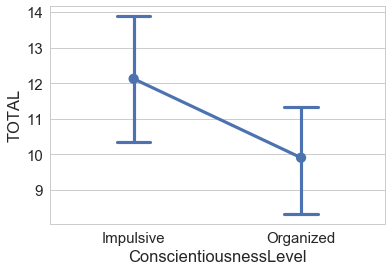

In [243]:
 sns.pointplot(x="ConscientiousnessLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_Accidents.pdf')

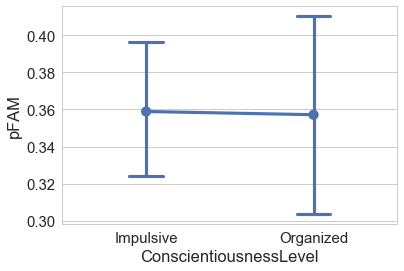

In [244]:
 sns.pointplot(x="ConscientiousnessLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_propAccidents_Familiar.pdf')

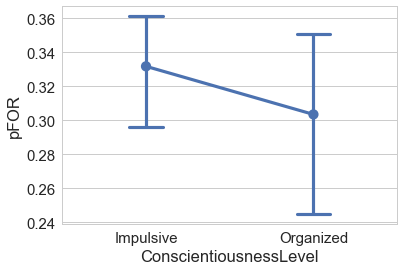

In [245]:
 sns.pointplot(x="ConscientiousnessLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_propAccidents_Foreign.pdf')

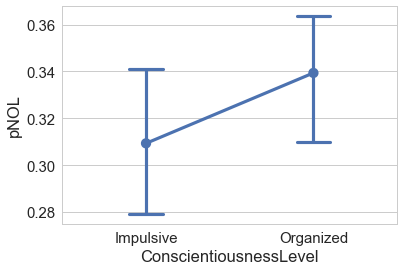

In [246]:
 sns.pointplot(x="ConscientiousnessLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_propAccidents_NoLyrics.pdf')

In [247]:
conditions = [
                  (data['Agreeableness'] >= 50),
                  (data['Agreeableness'] < 50)
]
choices = ['Competitive','Team worker']
data['AgreeablenessLevel'] = np.select(conditions, choices, default=None)
data['AgreeablenessLevel'].value_counts()

Competitive    20
Team worker    10
Name: AgreeablenessLevel, dtype: int64

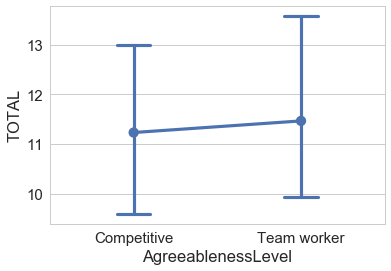

In [248]:
 sns.pointplot(x="AgreeablenessLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_Accidents.pdf')

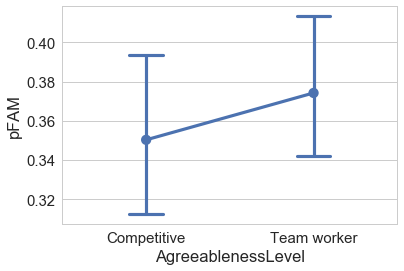

In [249]:
 sns.pointplot(x="AgreeablenessLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_propAccidents_Familiar.pdf')

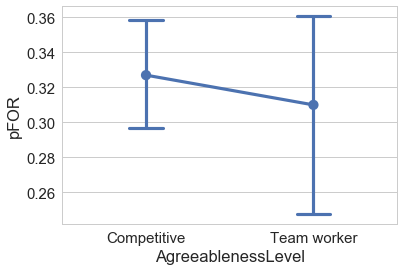

In [250]:
 sns.pointplot(x="AgreeablenessLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_propAccidents_Foreign.pdf')

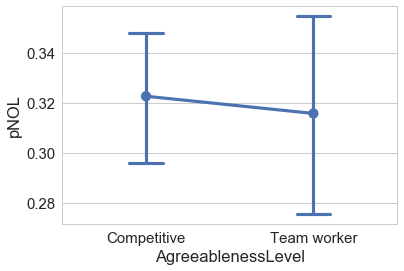

In [251]:
 sns.pointplot(x="AgreeablenessLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_propAccidents_NoLyrics.pdf')

In [252]:
conditions = [
                  (data['Neuroticism'] >= 50),
                  (data['Neuroticism'] < 50)
]
choices = ['Emotional','Relaxed']
data['NeuroticismLevel'] = np.select(conditions, choices, default=None)
data['NeuroticismLevel'].value_counts()

Emotional    25
Relaxed       5
Name: NeuroticismLevel, dtype: int64

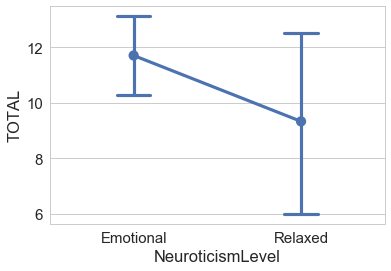

In [253]:
 sns.pointplot(x="NeuroticismLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_Accidents.pdf')

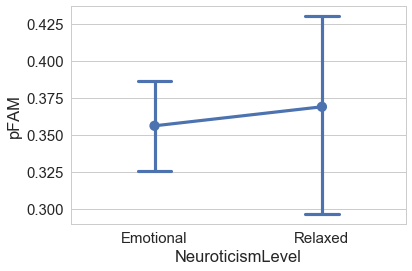

In [254]:
 sns.pointplot(x="NeuroticismLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_propAccidents_Familiar.pdf')

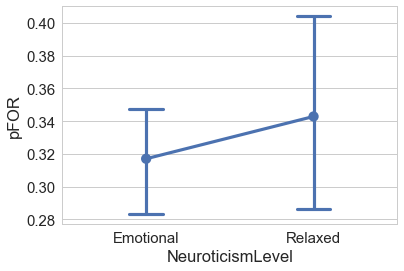

In [255]:
 sns.pointplot(x="NeuroticismLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_propAccidents_Foreign.pdf')

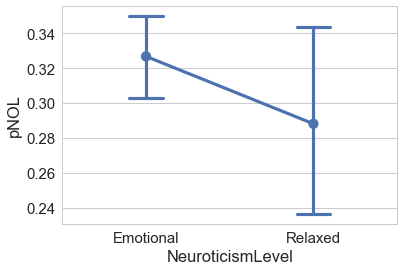

In [256]:
 sns.pointplot(x="NeuroticismLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_propAccidents_NoLyrics.pdf')

## Part 3: Music sophistication 

In [257]:
data01

,Mother tongue,NoLyricsLike,ForeignLike,FamiliarLike,ActiveEngagement,PerceptualAbilities,MusicalTraining,SingingAbilities,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Timestamp,,,,,,,,,,,,,,,
0,French,1,1,1,51,52,29,12,41,67,79,92,79,76,66
1,French,6,4,4,56,58,45,41,33,111,44,38,85,42,79
2,Spanish,4,1,7,37,43,24,31,31,79,34,79,85,69,24
3,Persian,2,1,5,36,53,27,42,27,86,62,85,66,76,50
4,Spanish,5,7,3,45,38,18,32,39,83,73,95,79,60,79
5,French,5,3,5,50,53,25,26,35,71,46,73,66,52,85
6,French,4,5,3,46,55,34,32,36,91,28,73,73,85,16
7,French,2,5,6,51,54,39,32,37,96,52,24,79,60,16
8,French,5,4,5,55,55,40,35,41,102,66,34,88,85,52


In [258]:
conditions = [
                  (data['ActiveEngagement'] >= 41.52),
                  (data['ActiveEngagement'] < 41.52)
]
choices = ['High Active Engagement','Low Active Engagement']
data['ActiveEngagementLevel'] = np.select(conditions, choices, default=None)
data['ActiveEngagementLevel'].value_counts()

Low Active Engagement     17
High Active Engagement    13
Name: ActiveEngagementLevel, dtype: int64

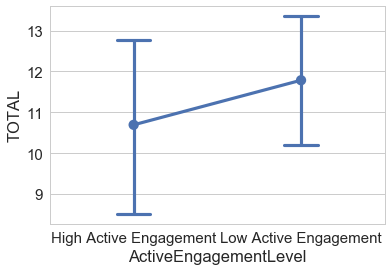

In [259]:
 sns.pointplot(x="ActiveEngagementLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents.pdf')

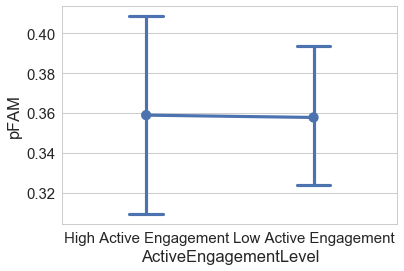

In [260]:
 sns.pointplot(x="ActiveEngagementLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents_Familiar.pdf')

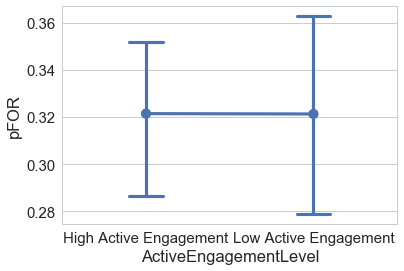

In [261]:
 sns.pointplot(x="ActiveEngagementLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents_Foreign.pdf')

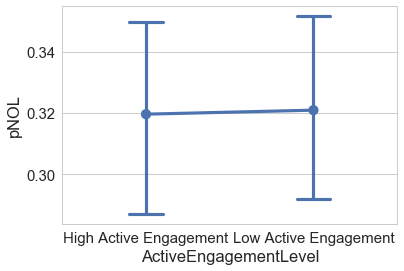

In [262]:
 sns.pointplot(x="ActiveEngagementLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents_NoLyrics.pdf')

In [263]:
conditions = [
                  (data['PerceptualAbilities'] >= 50.20),
                  (data['PerceptualAbilities'] < 50.20)
]
choices = ['High Perceptual Abilities','Low Perceptual Abilities']
data['PerceptualAbilitiesLevel'] = np.select(conditions, choices, default=None)
data['PerceptualAbilitiesLevel'].value_counts()

Low Perceptual Abilities     18
High Perceptual Abilities    12
Name: PerceptualAbilitiesLevel, dtype: int64

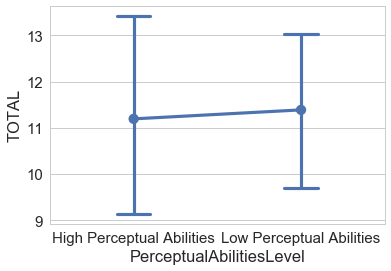

In [264]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_Accidents.pdf')

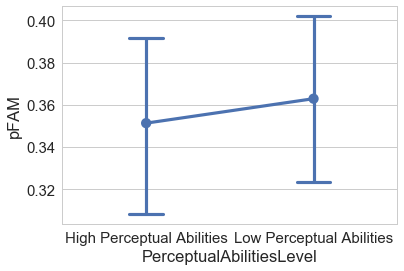

In [265]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_propAccidents_Familiar.pdf')

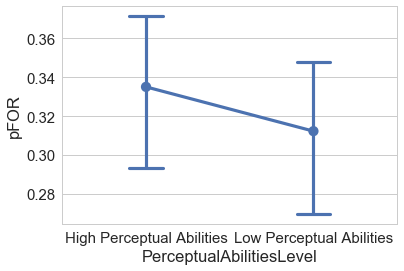

In [266]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_propAccidents_Foreign.pdf')

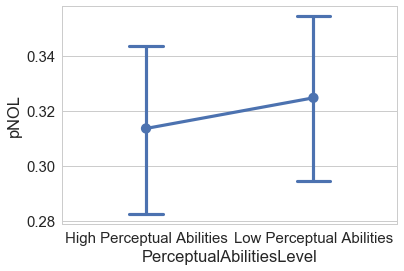

In [267]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_propAccidents_NoLyrics.pdf')

In [268]:
conditions = [
                  (data['MusicalTraining'] >= 26.52),
                  (data['MusicalTraining'] < 26.52)
]
choices = ['High Musical Training','Low Musical Training']
data['MusicalTrainingLevel'] = np.select(conditions, choices, default=None)
data['MusicalTrainingLevel'].value_counts()

Low Musical Training     20
High Musical Training    10
Name: MusicalTrainingLevel, dtype: int64

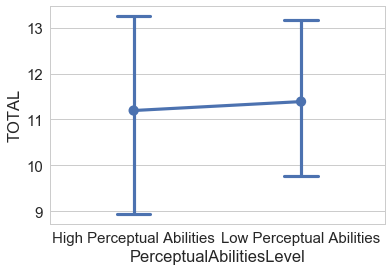

In [269]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_Accidents.pdf')

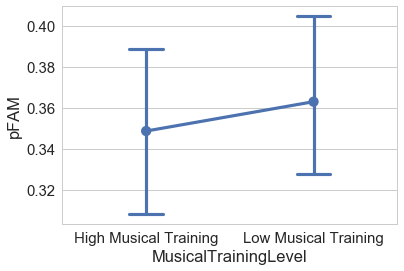

In [270]:
 sns.pointplot(x="MusicalTrainingLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicalTraining_propAccidents_Familiar.pdf')

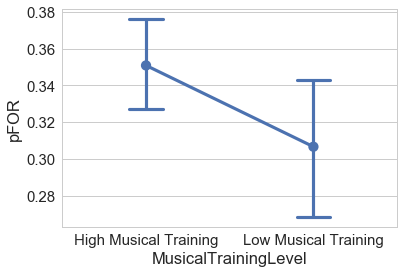

In [271]:
 sns.pointplot(x="MusicalTrainingLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicalTraining_propAccidents_Foreign.pdf')

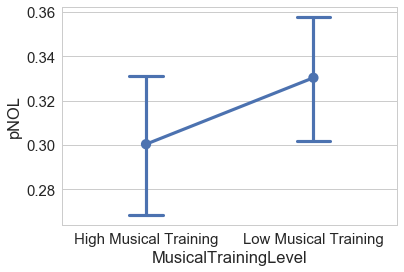

In [272]:
sns.pointplot(x="MusicalTrainingLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicalTraining_propAccidents_NoLyrics.pdf')

In [273]:
conditions = [
                  (data['SingingAbilities'] >= 31.67),
                  (data['SingingAbilities'] < 31.67)
]
choices = ['High Singing Abilities','Low Singing Abilities']
data['SingingAbilitiesLevel'] = np.select(conditions, choices, default=None)
data['SingingAbilitiesLevel'].value_counts()

Low Singing Abilities     17
High Singing Abilities    13
Name: SingingAbilitiesLevel, dtype: int64

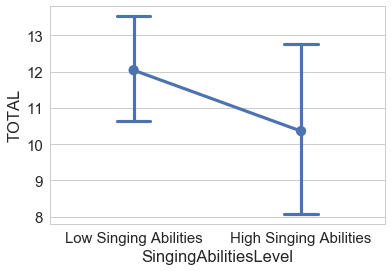

In [274]:
 sns.pointplot(x="SingingAbilitiesLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_Accidents.pdf')

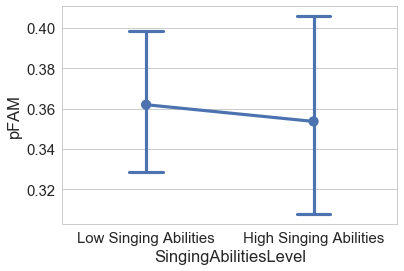

In [275]:
 sns.pointplot(x="SingingAbilitiesLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_propAccidents_Familiar.pdf')

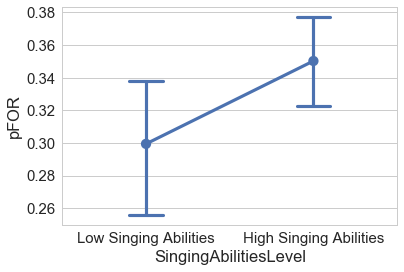

In [276]:
 sns.pointplot(x="SingingAbilitiesLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_propAccidents_Foreign.pdf')

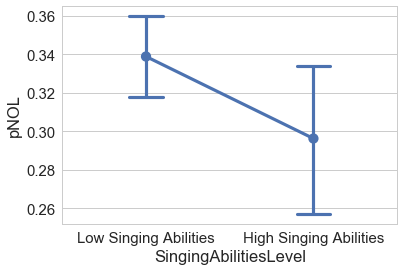

In [277]:
 sns.pointplot(x="SingingAbilitiesLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_propAccidents_NoLyrics.pdf')

In [278]:
conditions = [
                  (data['Emotions'] >= 34.66),
                  (data['Emotions'] < 34.66)
]
choices = ['High Emotion','Low Emotion']
data['EmotionsLevel'] = np.select(conditions, choices, default=None)
data['EmotionsLevel'].value_counts()

High Emotion    15
Low Emotion     15
Name: EmotionsLevel, dtype: int64

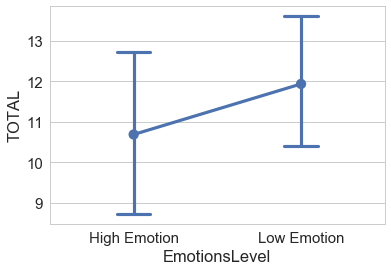

In [279]:
 sns.pointplot(x="EmotionsLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents.pdf')

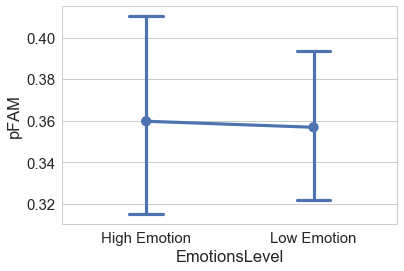

In [280]:
 sns.pointplot(x="EmotionsLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents_Familiar.pdf')

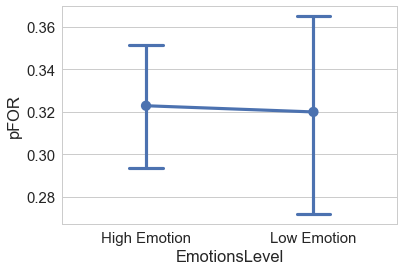

In [281]:
 sns.pointplot(x="EmotionsLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents_Foreign.pdf')

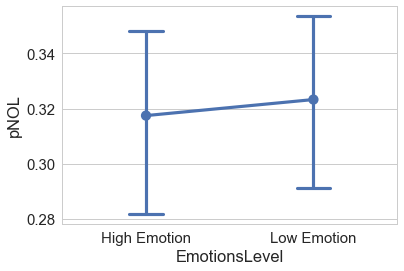

In [282]:
 sns.pointplot(x="EmotionsLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents_NOL.pdf')

In [283]:
conditions = [
                  (data['MusicSoph'] >= 81.58),
                  (data['MusicSoph'] < 81.58)
]
choices = ['High Musical Sophistication','Low Musical Sophistication']
data['MusicSophLevel'] = np.select(conditions, choices, default=None)
data['MusicSophLevel'].value_counts()

Low Musical Sophistication     22
High Musical Sophistication     8
Name: MusicSophLevel, dtype: int64

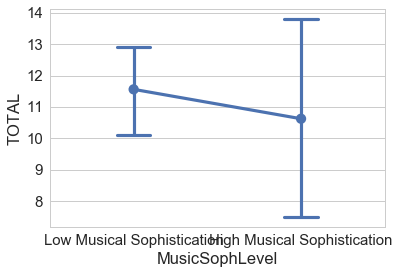

In [284]:
 sns.pointplot(x="MusicSophLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents.pdf')

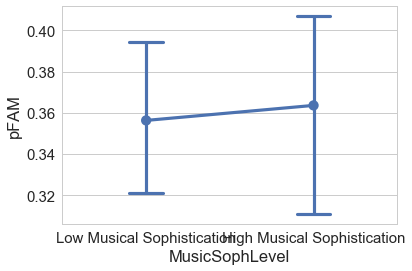

In [285]:
 sns.pointplot(x="MusicSophLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents_propFamiliar.pdf')

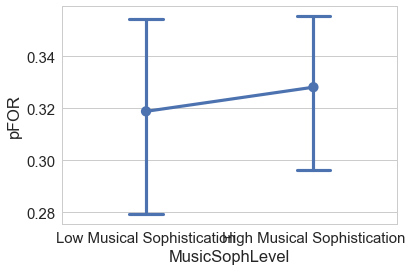

In [286]:
 sns.pointplot(x="MusicSophLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents_propForeign.pdf')

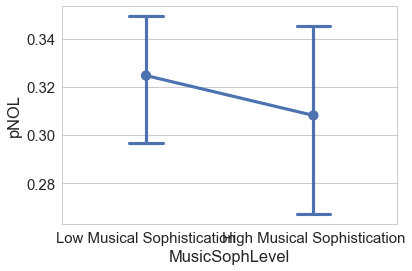

In [287]:
 sns.pointplot(x="MusicSophLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents_propNoLyrics.pdf')

In [288]:
data.to_csv('out.csv')

## Interaction effects

In [322]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
data['NoLyrics']='No Lyrics'
data['Native Tongue']='Native Tongue'
data['Foreign']='Foreign'
style_Song = pd.concat((data['NoLyrics'], data['Native Tongue'], data['Foreign']), axis=0)
style_Song = pd.DataFrame(style_Song, columns=['Style'])
music_soph = pd.concat((data['MusicSophLevel'],data['MusicSophLevel'],data['MusicSophLevel']), axis=0)
music_soph
music_sophistication = pd.concat((prop_Accidents,style_Song,music_soph), axis=1)
music_sophistication = pd.DataFrame(music_sophistication)
music_sophistication

,Accidents,Style,MusicSophLevel
Timestamp,,,
0,0.325581,No Lyrics,Low Musical Sophistication
1,0.354839,No Lyrics,High Musical Sophistication
2,0.285714,No Lyrics,Low Musical Sophistication
3,0.222222,No Lyrics,High Musical Sophistication
4,0.354167,No Lyrics,High Musical Sophistication
5,0.333333,No Lyrics,Low Musical Sophistication
6,0.250000,No Lyrics,High Musical Sophistication
7,0.384615,No Lyrics,High Musical Sophistication
8,0.325000,No Lyrics,High Musical Sophistication


In [323]:
dataLMS_NL = music_sophistication.loc[music_sophistication["MusicSophLevel"] == "Low Musical Sophistication" ]
dataLMS_NL = dataLMS.loc[dataLMS["Style"] == "No Lyrics"]
dataHMS_NL = music_sophistication.loc[music_sophistication["MusicSophLevel"] == "High Musical Sophistication"]
dataHMS_NL = dataHMS.loc[dataHMS["Style"] == "No Lyrics"]
stats.kruskal(dataLMS_NL['Accidents'],dataHMS_NL['Accidents'])

KruskalResult(statistic=0.4011108131627994, pvalue=0.5265161436532728)

In [327]:
dataLMS_NT = music_sophistication.loc[music_sophistication["MusicSophLevel"] == "Low Musical Sophistication" ]
dataLMS_NT = dataLMS_NT.loc[dataLMS_NT["Style"] == "Native Tongue"]
dataLMS_NT
dataHMS_NT = music_sophistication.loc[music_sophistication["MusicSophLevel"] == "High Musical Sophistication"]
dataHMS_NT = dataHMS_NT.loc[dataHMS_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLMS_NT['Accidents'],dataHMS_NT['Accidents'])


KruskalResult(statistic=0.4010215385549287, pvalue=0.5265621629085143)

In [328]:
dataLMS_FO = music_sophistication.loc[music_sophistication["MusicSophLevel"] == "Low Musical Sophistication" ]
dataLMS_FO = dataLMS_FO.loc[dataLMS_FO["Style"] == "Foreign"]
dataHMS_FO = music_sophistication.loc[music_sophistication["MusicSophLevel"] == "High Musical Sophistication"]
dataHMS_FO = dataHMS_FO.loc[dataHMS_FO["Style"] == "Foreign"]
stats.kruskal(dataLMS_FO['Accidents'],dataHMS_FO['Accidents'])

KruskalResult(statistic=0.0005504656813115059, pvalue=0.9812817457077749)

In [476]:
stats.kruskal(dataLMS_NL['Accidents'],dataLMS_NT['Accidents'],dataLMS_FO['Accidents'])

KruskalResult(statistic=0.8932361069983009, pvalue=0.6397882264879793)

In [477]:
stats.kruskal(dataHMS_NL['Accidents'],dataHMS_NT['Accidents'],dataHMS_FO['Accidents'])

KruskalResult(statistic=3.2243575783972123, pvalue=0.1994525752017601)

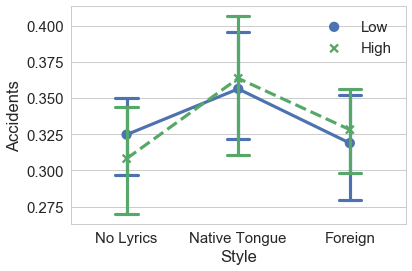

In [409]:
ax=sns.pointplot(x="Style", y="Accidents", hue="MusicSophLevel",
data=music_sophistication,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=0.2, ci=95, legend=False)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Low', 'High'])

In [ ]:
emotions = pd.concat((data['EmotionsLevel'],data['EmotionsLevel'],data['EmotionsLevel']), axis=0)
emotions
music_emotions = pd.concat((prop_Accidents,style_Song,emotions), axis=1)
music_emotions
music_emotions = pd.DataFrame(music_emotions)

In [346]:
dataLEL_NL = music_emotions.loc[music_emotions["EmotionsLevel"] == "Low Emotion" ]
dataLEL_NL = dataLEL_NL.loc[dataLEL_NL["Style"] == "No Lyrics"]
dataHEL_NL = music_emotions.loc[music_emotions["EmotionsLevel"] == "High Emotion"]
dataHEL_NL = dataHEL_NL.loc[dataHEL_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLEL_NL['Accidents'],dataHEL_NL['Accidents'])


KruskalResult(statistic=0.0017215791035900046, pvalue=0.9669037373050886)

In [347]:
dataLEL_NT = music_emotions.loc[music_emotions["EmotionsLevel"] == "Low Emotion" ]
dataLEL_NT = dataLEL_NT.loc[dataLEL_NT["Style"] == "Native Tongue"]
dataHEL_NT = music_emotions.loc[music_emotions["EmotionsLevel"] == "High Emotion"]
dataHEL_NT = dataHEL_NT.loc[dataHEL_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLEL_NT['Accidents'],dataHEL_NT['Accidents'])

KruskalResult(statistic=0.0038726908524336023, pvalue=0.950378917538112)

In [348]:
dataLEL_FO = music_emotions.loc[music_emotions["EmotionsLevel"] == "Low Emotion" ]
dataLEL_FO = dataLEL_FO.loc[dataLEL_FO["Style"] == "Foreign"]
dataHEL_FO = music_emotions.loc[music_emotions["EmotionsLevel"] == "High Emotion"]
dataHEL_FO = dataHEL_FO.loc[dataHEL_FO["Style"] == "Foreign"]
stats.kruskal(dataLEL_FO['Accidents'],dataHEL_FO['Accidents'])

KruskalResult(statistic=0.07276911655531304, pvalue=0.7873468100499537)

In [478]:
stats.kruskal(dataLEL_NL['Accidents'],dataLEL_NT['Accidents'],dataLEL_FO['Accidents'])

KruskalResult(statistic=0.9658560161690761, pvalue=0.616974238931999)

In [480]:
stats.kruskal(dataHEL_NL['Accidents'],dataHEL_NT['Accidents'],dataHEL_FO['Accidents'])

KruskalResult(statistic=1.9051965180691337, pvalue=0.385737474401046)

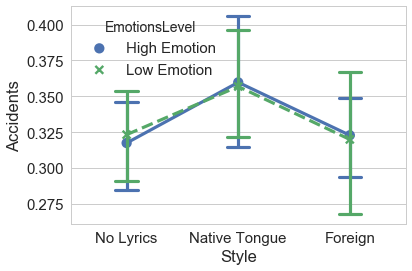

In [410]:
sns.pointplot(x="Style", y="Accidents", hue="EmotionsLevel",
data=music_emotions,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=0.2, ci=95, legend=False)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Low', 'High'])

In [350]:
singing = pd.concat((data['SingingAbilitiesLevel'],data['SingingAbilitiesLevel'],data['SingingAbilitiesLevel']), axis=0)
singing
singing_abilities = pd.concat((prop_Accidents,style_Song,singing), axis=1)
singing_abilities
singing_abilities = pd.DataFrame(singing_abilities)

In [352]:
dataLSA_NL = singing_abilities.loc[singing_abilities["SingingAbilitiesLevel"] == "Low Singing Abilities" ]
dataLSA_NL = dataLSA_NL.loc[dataLSA_NL["Style"] == "No Lyrics"]
dataHSA_NL = singing_abilities.loc[singing_abilities["SingingAbilitiesLevel"] == "High Singing Abilities"]
dataHSA_NL = dataHSA_NL.loc[dataHSA_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLSA_NL['Accidents'],dataHSA_NL['Accidents'])

KruskalResult(statistic=2.0861974833086925, pvalue=0.14863562687984505)

In [354]:
dataLSA_NT = singing_abilities.loc[singing_abilities["SingingAbilitiesLevel"] == "Low Singing Abilities" ]
dataLSA_NT = dataLSA_NT.loc[dataLSA_NT["Style"] == "Native Tongue"]
dataHSA_NT = singing_abilities.loc[singing_abilities["SingingAbilitiesLevel"] == "High Singing Abilities"]
dataHSA_NT = dataHSA_NT.loc[dataHSA_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLSA_NT['Accidents'],dataHSA_NT['Accidents'])

KruskalResult(statistic=0.2120342050429405, pvalue=0.645177665694117)

In [356]:
dataLSA_FO = singing_abilities.loc[singing_abilities["SingingAbilitiesLevel"] == "Low Singing Abilities" ]
dataLSA_FO = dataLSA_FO.loc[dataLSA_FO["Style"] == "Foreign"]
dataHSA_FO = singing_abilities.loc[singing_abilities["SingingAbilitiesLevel"] == "High Singing Abilities"]
dataHSA_FO = dataHSA_FO.loc[dataHSA_FO["Style"] == "Foreign"]
stats.kruskal(dataLSA_FO['Accidents'],dataHSA_FO['Accidents'])

KruskalResult(statistic=2.40056838222696, pvalue=0.12129117415934333)

In [481]:
stats.kruskal(dataLSA_NL['Accidents'],dataLSA_NT['Accidents'],dataLSA_FO['Accidents'])

KruskalResult(statistic=3.7358227278416627, pvalue=0.154445906464606)

In [482]:
stats.kruskal(dataHSA_NL['Accidents'],dataHSA_NT['Accidents'],dataHSA_FO['Accidents'])

KruskalResult(statistic=3.709945310917566, pvalue=0.15645722086738653)

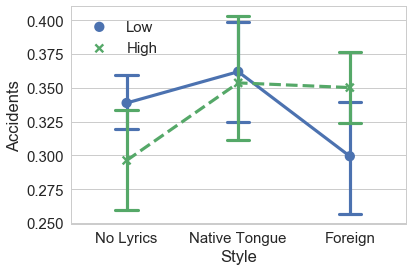

In [416]:
ax=sns.pointplot(x="Style", y="Accidents", hue="SingingAbilitiesLevel",
data=singing_abilities,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=0.2, ci=95, legend=False)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Low', 'High'])
plt.savefig('Style_Accidents_SingingAbilities.jpg')

In [483]:
training = pd.concat((data['MusicalTrainingLevel'],data['MusicalTrainingLevel'],data['MusicalTrainingLevel']), axis=0)
training
training_abilities = pd.concat((prop_Accidents,style_Song,training), axis=1)
training_abilities
training_abilities = pd.DataFrame(training_abilities)

In [419]:
dataLTA_NL = training_abilities.loc[training_abilities["MusicalTrainingLevel"] == "Low Musical Training" ]
dataLTA_NL = dataLTA_NL.loc[dataLTA_NL["Style"] == "No Lyrics"]
dataHTA_NL = training_abilities.loc[training_abilities["MusicalTrainingLevel"] == "High Musical Training"]
dataHTA_NL = dataHTA_NL.loc[dataHTA_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLTA_NL['Accidents'],dataHTA_NL['Accidents'])

KruskalResult(statistic=2.045720169189673, pvalue=0.15263473789504017)

In [421]:
dataLTA_NT = training_abilities.loc[training_abilities["MusicalTrainingLevel"] == "Low Musical Training" ]
dataLTA_NT = dataLTA_NT.loc[dataLTA_NT["Style"] == "Native Tongue"]
dataHTA_NT = training_abilities.loc[training_abilities["MusicalTrainingLevel"] == "High Musical Training"]
dataHTA_NT = dataHTA_NT.loc[dataHTA_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLTA_NT['Accidents'],dataHTA_NT['Accidents'])

KruskalResult(statistic=0.02372023147117003, pvalue=0.8775989035255704)

In [423]:
dataLTA_FO = training_abilities.loc[training_abilities["MusicalTrainingLevel"] == "Low Musical Training" ]
dataLTA_FO = dataLTA_FO.loc[dataLTA_FO["Style"] == "Foreign"]
dataHTA_FO = training_abilities.loc[training_abilities["MusicalTrainingLevel"] == "High Musical Training"]
dataHTA_FO = dataHTA_FO.loc[dataHTA_FO["Style"] == "Foreign"]
stats.kruskal(dataLTA_FO['Accidents'],dataHTA_FO['Accidents'])

KruskalResult(statistic=1.7438752783964298, pvalue=0.18664855153371376)

In [484]:
stats.kruskal(dataLTA_NL['Accidents'],dataLTA_NT['Accidents'],dataLTA_FO['Accidents'])

KruskalResult(statistic=2.634508648017335, pvalue=0.26786977680444296)

In [485]:
stats.kruskal(dataHTA_NL['Accidents'],dataHTA_NT['Accidents'],dataHTA_FO['Accidents'])

KruskalResult(statistic=4.191829919857524, pvalue=0.12295769081112393)

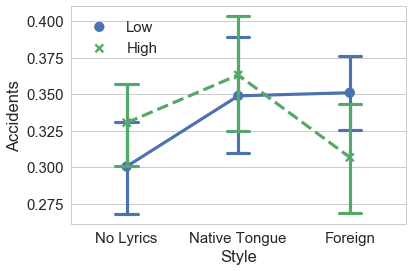

In [428]:
ax=sns.pointplot(x="Style", y="Accidents", hue="MusicalTrainingLevel",
data=training_abilities,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Low', 'High'])
plt.savefig('Style_Accidents_MusicalTrainingAbilities.jpg')

In [426]:
perceptual = pd.concat((data['PerceptualAbilitiesLevel'],data['PerceptualAbilitiesLevel'],data['PerceptualAbilitiesLevel']), axis=0)
perceptual
perceptual_abilities = pd.concat((prop_Accidents,style_Song,perceptual), axis=1)
perceptual_abilities
perceptual_abilities = pd.DataFrame(perceptual_abilities)

In [430]:
dataLPA_NL = perceptual_abilities.loc[perceptual_abilities["PerceptualAbilitiesLevel"] == "Low Perceptual Abilities" ]
dataLPA_NL = dataLPA_NL.loc[dataLPA_NL["Style"] == "No Lyrics"]
dataHPA_NL = perceptual_abilities.loc[perceptual_abilities["PerceptualAbilitiesLevel"] == "High Perceptual Abilities"]
dataHPA_NL = dataHPA_NL.loc[dataHPA_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLPA_NL['Accidents'],dataHPA_NL['Accidents'])

KruskalResult(statistic=0.28020493222518683, pvalue=0.5965669283642945)

In [431]:
dataLPA_NT = perceptual_abilities.loc[perceptual_abilities["PerceptualAbilitiesLevel"] == "Low Perceptual Abilities" ]
dataLPA_NT = dataLPA_NT.loc[dataLPA_NT["Style"] == "Native Tongue"]
dataHPA_NT = perceptual_abilities.loc[perceptual_abilities["PerceptualAbilitiesLevel"] == "High Perceptual Abilities"]
dataHPA_NT = dataHPA_NT.loc[dataHPA_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLPA_NT['Accidents'],dataHPA_NT['Accidents'])

KruskalResult(statistic=0.004034052971285003, pvalue=0.949357056060887)

In [432]:
dataLPA_FO = perceptual_abilities.loc[perceptual_abilities["PerceptualAbilitiesLevel"] == "Low Perceptual Abilities" ]
dataLPA_FO = dataLPA_FO.loc[dataLPA_FO["Style"] == "Foreign"]
dataHPA_FO = perceptual_abilities.loc[perceptual_abilities["PerceptualAbilitiesLevel"] == "High Perceptual Abilities"]
dataHPA_FO = dataHPA_FO.loc[dataHPA_FO["Style"] == "Foreign"]
stats.kruskal(dataLPA_FO['Accidents'],dataHPA_FO['Accidents'])

KruskalResult(statistic=0.8293275179410987, pvalue=0.362467056290678)

In [486]:
stats.kruskal(dataLPA_NL['Accidents'],dataLPA_NT['Accidents'],dataLPA_FO['Accidents'])

KruskalResult(statistic=1.9891617517456401, pvalue=0.36987843703832957)

In [487]:
stats.kruskal(dataHPA_NL['Accidents'],dataHPA_NT['Accidents'],dataHPA_FO['Accidents'])

KruskalResult(statistic=2.069008069362183, pvalue=0.3554026045870518)

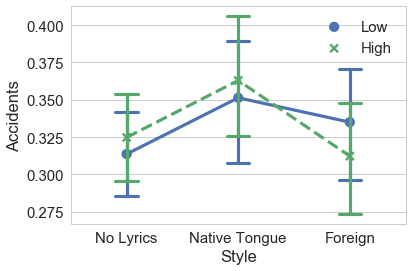

In [427]:
ax=sns.pointplot(x="Style", y="Accidents", hue="PerceptualAbilitiesLevel",
data=perceptual_abilities,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Low', 'High'])
plt.savefig('Style_Accidents_PerceptualAbilitiesAbilities.jpg')

In [433]:
engagement = pd.concat((data['ActiveEngagementLevel'],data['ActiveEngagementLevel'],data['ActiveEngagementLevel']), axis=0)
engagement
active_engagement = pd.concat((prop_Accidents,style_Song,engagement), axis=1)
active_engagement 
active_engagement = pd.DataFrame(active_engagement)

In [445]:
dataLAE_NL = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "Low Active Engagement" ]
dataLAE_NL = dataLAE_NL.loc[dataLAE_NL["Style"] == "No Lyrics"]
dataHAE_NL = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "High Active Engagement"]
dataHAE_NL = dataHAE_NL.loc[dataHAE_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLAE_NL['Accidents'],dataHAE_NL['Accidents'])

KruskalResult(statistic=0.09859156348338861, pvalue=0.7535264043622973)

In [447]:
dataLAE_NT = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "Low Active Engagement" ]
dataLAE_NT = dataLAE_NT.loc[dataLAE_NT["Style"] == "Native Tongue"]
dataHAE_NT = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "High Active Engagement"]
dataHAE_NT = dataHAE_NT.loc[dataHAE_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLAE_NT['Accidents'],dataHAE_NT['Accidents'])

KruskalResult(statistic=0.0, pvalue=1.0)

In [448]:
dataLAE_FO = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "Low Active Engagement" ]
dataLAE_FO = dataLAE_FO.loc[dataLAE_FO["Style"] == "Foreign"]
dataHAE_FO = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "High Active Engagement"]
dataHAE_FO = dataHAE_FO.loc[dataHAE_FO["Style"] == "Foreign"]
stats.kruskal(dataLAE_FO['Accidents'],dataHAE_FO['Accidents'])

KruskalResult(statistic=0.05304396900100198, pvalue=0.8178487433914066)

In [ ]:
dataLAE_NL = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "Low Active Engagement" ]
dataLAE_NL = dataLAE_NL.loc[dataLAE_NL["Style"] == "No Lyrics"]
dataHAE_NL = active_engagement.loc[active_engagement["ActiveEngagementLevel"] == "High Active Engagement"]
dataHAE_NL = dataHAE_NL.loc[dataHAE_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLAE_NL['Accidents'],dataHAE_NL['Accidents'])

In [488]:
stats.kruskal(dataLAE_NL['Accidents'],dataLAE_NT['Accidents'],dataLAE_FO['Accidents'])

KruskalResult(statistic=1.9468053381048513, pvalue=0.3777953360357665)

In [489]:
stats.kruskal(dataHAE_NL['Accidents'],dataHAE_NT['Accidents'],dataHAE_FO['Accidents'])

KruskalResult(statistic=0.8354609929078065, pvalue=0.6585396832912876)

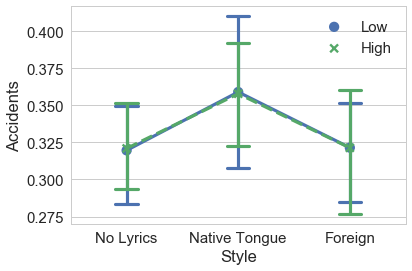

In [434]:
ax=sns.pointplot(x="Style", y="Accidents", hue="ActiveEngagementLevel",
data=active_engagement,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Low', 'High'])
plt.savefig('Style_Accidents_ActiveEngagement.jpg')

In [435]:
openness = pd.concat((data['OpennessLevel'],data['OpennessLevel'],data['OpennessLevel']), axis=0)
openness
Openness = pd.concat((prop_Accidents,style_Song,openness), axis=1)
Openness
Openness = pd.DataFrame(Openness)

In [440]:
dataLO_NL = Openness.loc[Openness["OpennessLevel"] == "Traditional" ]
dataLO_NL = dataLO_NL.loc[dataLO_NL["Style"] == "No Lyrics"]
dataHO_NL = Openness.loc[Openness["OpennessLevel"] == "Liberal"]
dataHO_NL = dataHO_NL.loc[dataHO_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLO_NL['Accidents'],dataHO_NL['Accidents'])

KruskalResult(statistic=0.7908504007123835, pvalue=0.37384310683088384)

In [441]:
dataLO_NT = Openness.loc[Openness["OpennessLevel"] == "Traditional" ]
dataLO_NT = dataLO_NT.loc[dataLO_NT["Style"] == "Native Tongue"]
dataHO_NT = Openness.loc[Openness["OpennessLevel"] == "Liberal"]
dataHO_NT = dataHO_NT.loc[dataHO_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLO_NT['Accidents'],dataHO_NT['Accidents'])

KruskalResult(statistic=0.9901358903973987, pvalue=0.31970916396181404)

In [443]:
dataLO_FO = Openness.loc[Openness["OpennessLevel"] == "Traditional" ]
dataLO_FO = dataLO_FO.loc[dataLO_FO["Style"] == "Foreign"]
dataHO_FO = Openness.loc[Openness["OpennessLevel"] == "Liberal"]
dataHO_FO = dataHO_FO.loc[dataHO_FO["Style"] == "Foreign"]
stats.kruskal(dataLO_FO['Accidents'],dataHO_FO['Accidents'])

KruskalResult(statistic=0.00403674832961771, pvalue=0.9493401630533314)

In [490]:
stats.kruskal(dataLO_NL['Accidents'],dataLO_NT['Accidents'],dataLO_FO['Accidents'])

KruskalResult(statistic=3.1953027767048665, pvalue=0.20237125177284296)

In [491]:
stats.kruskal(dataHO_NL['Accidents'],dataHO_NT['Accidents'],dataHO_FO['Accidents'])

KruskalResult(statistic=0.9666196251938833, pvalue=0.6167387203474283)

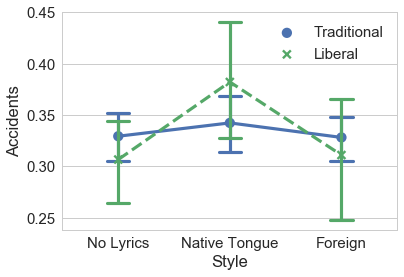

In [449]:
ax=sns.pointplot(x="Style", y="Accidents", hue="OpennessLevel",
data=Openness,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Traditional', 'Liberal'])
plt.savefig('Style_Accidents_Openness.jpg')

In [450]:
conscientiousness = pd.concat((data['ConscientiousnessLevel'],data['ConscientiousnessLevel'],data['ConscientiousnessLevel']), axis=0)
conscientiousness
Conscientiousness = pd.concat((prop_Accidents,style_Song,conscientiousness), axis=1)
Conscientiousness
Conscientiousness = pd.DataFrame(Conscientiousness)

In [451]:
dataLC_NL = Conscientiousness.loc[Conscientiousness["ConscientiousnessLevel"] == "Impulsive" ]
dataLC_NL = dataLC_NL.loc[dataLC_NL["Style"] == "No Lyrics"]
dataHC_NL = Conscientiousness.loc[Conscientiousness["ConscientiousnessLevel"] == "Organized"]
dataHC_NL = dataHC_NL.loc[dataHC_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLC_NL['Accidents'],dataHC_NL['Accidents'])

KruskalResult(statistic=1.668037169747821, pvalue=0.19652164576136172)

In [452]:
dataLC_NT = Conscientiousness.loc[Conscientiousness["ConscientiousnessLevel"] == "Impulsive" ]
dataLC_NT = dataLC_NT.loc[dataLC_NT["Style"] == "Native Tongue"]
dataHC_NT = Conscientiousness.loc[Conscientiousness["ConscientiousnessLevel"] == "Organized"]
dataHC_NT = dataHC_NT.loc[dataHC_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLC_NT['Accidents'],dataHC_NT['Accidents'])

KruskalResult(statistic=0.0018529621303554954, pvalue=0.965664827947639)

In [453]:
dataLC_FO = Conscientiousness.loc[Conscientiousness["ConscientiousnessLevel"] == "Impulsive" ]
dataLC_FO = dataLC_FO.loc[dataLC_FO["Style"] == "Foreign"]
dataHC_FO = Conscientiousness.loc[Conscientiousness["ConscientiousnessLevel"] == "Organized"]
dataHC_FO = dataHC_FO.loc[dataHC_FO["Style"] == "Foreign"]
stats.kruskal(dataLC_FO['Accidents'],dataHC_FO['Accidents'])

KruskalResult(statistic=0.7416800758730321, pvalue=0.38912322089097384)

In [492]:
stats.kruskal(dataLC_NL['Accidents'],dataLC_NT['Accidents'],dataLC_FO['Accidents'])

KruskalResult(statistic=3.0857308614379004, pvalue=0.21376768650208475)

In [494]:
stats.kruskal(dataHC_NL['Accidents'],dataHC_NT['Accidents'],dataHC_FO['Accidents'])

KruskalResult(statistic=1.6423228944968031, pvalue=0.4399204133200689)

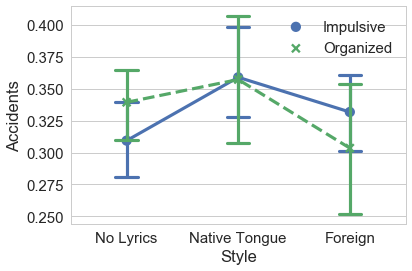

In [454]:
ax=sns.pointplot(x="Style", y="Accidents", hue="ConscientiousnessLevel",
data=Conscientiousness,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Impulsive', 'Organized'])
plt.savefig('Style_Accidents_Conscientiousness.jpg')

In [455]:
extraversion = pd.concat((data['ExtraversionLevel'],data['ExtraversionLevel'],data['ExtraversionLevel']), axis=0)
extraversion
Extraversion = pd.concat((prop_Accidents,style_Song,extraversion), axis=1)
Extraversion
Extraversion = pd.DataFrame(Extraversion)

In [456]:
dataLE_NL = Extraversion.loc[Extraversion["ExtraversionLevel"] == "Introverts" ]
dataLE_NL = dataLE_NL.loc[dataLE_NL["Style"] == "No Lyrics"]
dataHE_NL = Extraversion.loc[Extraversion["ExtraversionLevel"] == "Extroverts"]
dataHE_NL = dataHE_NL.loc[dataHE_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLE_NL['Accidents'],dataHE_NL['Accidents'])

KruskalResult(statistic=2.2537035537926133, pvalue=0.13329504617302)

In [457]:
dataLE_NT = Extraversion.loc[Extraversion["ExtraversionLevel"] == "Introverts" ]
dataLE_NT = dataLE_NT.loc[dataLE_NT["Style"] == "Native Tongue"]
dataHE_NT = Extraversion.loc[Extraversion["ExtraversionLevel"] == "Extroverts"]
dataHE_NT = dataHE_NT.loc[dataHE_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLE_NT['Accidents'],dataHE_NT['Accidents'])

KruskalResult(statistic=0.4312769358395947, pvalue=0.5113630396160733)

In [458]:
dataLE_FO = Extraversion.loc[Extraversion["ExtraversionLevel"] == "Introverts" ]
dataLE_FO = dataLE_FO.loc[dataLE_FO["Style"] == "Foreign"]
dataHE_FO = Extraversion.loc[Extraversion["ExtraversionLevel"] == "Extroverts"]
dataHE_FO = dataHE_FO.loc[dataHE_FO["Style"] == "Foreign"]
stats.kruskal(dataLE_FO['Accidents'],dataHE_FO['Accidents'])

KruskalResult(statistic=2.8536140919214357, pvalue=0.09116877929142558)

In [495]:
stats.kruskal(dataLE_NL['Accidents'],dataLE_NT['Accidents'],dataLE_FO['Accidents'])

KruskalResult(statistic=3.266590513489993, pvalue=0.19528499848061834)

In [496]:
stats.kruskal(dataHE_NL['Accidents'],dataHE_NT['Accidents'],dataHE_FO['Accidents'])

KruskalResult(statistic=3.5134935024253124, pvalue=0.1726054799851304)

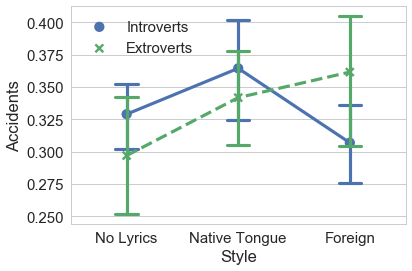

In [459]:
ax=sns.pointplot(x="Style", y="Accidents", hue="ExtraversionLevel",
data=Extraversion,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Introverts', 'Extroverts'])
plt.savefig('Style_Accidents_Extraversion.jpg')

In [460]:
agreeableness = pd.concat((data['AgreeablenessLevel'],data['AgreeablenessLevel'],data['AgreeablenessLevel']), axis=0)
agreeableness
Agreeableness = pd.concat((prop_Accidents,style_Song,agreeableness), axis=1)
Agreeableness
Agreeableness = pd.DataFrame(Agreeableness)

In [461]:
dataLA_NL = Agreeableness.loc[Agreeableness["AgreeablenessLevel"] == "Competitive" ]
dataLA_NL = dataLA_NL.loc[dataLA_NL["Style"] == "No Lyrics"]
dataHA_NL = Agreeableness.loc[Agreeableness["AgreeablenessLevel"] == "Team worker"]
dataHA_NL = dataHA_NL.loc[dataHA_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLA_NL['Accidents'],dataHA_NL['Accidents'])

KruskalResult(statistic=0.37960819234193727, pvalue=0.5378129997765877)

In [462]:
dataLA_NT = Agreeableness.loc[Agreeableness["AgreeablenessLevel"] == "Competitive" ]
dataLA_NT = dataLA_NT.loc[dataLA_NT["Style"] == "Native Tongue"]
dataHA_NT = Agreeableness.loc[Agreeableness["AgreeablenessLevel"] == "Team worker"]
dataHA_NT = dataHA_NT.loc[dataHA_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLA_NT['Accidents'],dataHA_NT['Accidents'])

KruskalResult(statistic=0.5596038281771674, pvalue=0.4544199102519483)

In [464]:
dataLA_FO = Agreeableness.loc[Agreeableness["AgreeablenessLevel"] == "Competitive" ]
dataLA_FO = dataLA_FO.loc[dataLA_FO["Style"] == "Foreign"]
dataHA_FO = Agreeableness.loc[Agreeableness["AgreeablenessLevel"] == "Team worker"]
dataHA_FO = dataHA_FO.loc[dataHA_FO["Style"] == "Foreign"]
stats.kruskal(dataLA_NL['Accidents'],dataHA_FO['Accidents'])

KruskalResult(statistic=0.06969292389852486, pvalue=0.7917844080408435)

In [497]:
stats.kruskal(dataLA_NL['Accidents'],dataLA_NT['Accidents'],dataLA_FO['Accidents'])

KruskalResult(statistic=0.7006075688902564, pvalue=0.7044740489511637)

In [498]:
stats.kruskal(dataHA_NL['Accidents'],dataHA_NT['Accidents'],dataHA_FO['Accidents'])

KruskalResult(statistic=4.693608017817372, pvalue=0.09567444879511205)

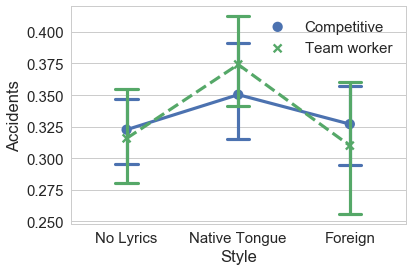

In [465]:
ax=sns.pointplot(x="Style", y="Accidents", hue="AgreeablenessLevel",
data=Agreeableness,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Competitive', 'Team worker'])
plt.savefig('Style_Accidents_Agreeableness.jpg')

In [466]:
neuroticism = pd.concat((data['NeuroticismLevel'],data['NeuroticismLevel'],data['NeuroticismLevel']), axis=0)
neuroticism
Neuroticism = pd.concat((prop_Accidents,style_Song,neuroticism), axis=1)
Neuroticism
Neuroticism = pd.DataFrame(Neuroticism)

In [467]:
dataLN_NL = Neuroticism.loc[Neuroticism["NeuroticismLevel"] == "Relaxed" ]
dataLN_NL = dataLN_NL.loc[dataLN_NL["Style"] == "No Lyrics"]
dataHN_NL = Neuroticism.loc[Neuroticism["NeuroticismLevel"] == "Emotional"]
dataHN_NL = dataHN_NL.loc[dataHN_NL["Style"] == "No Lyrics"]
stats.kruskal(dataLN_NL['Accidents'],dataHN_NL['Accidents'])

KruskalResult(statistic=1.7849332146037435, pvalue=0.18154472106124356)

In [470]:
dataLN_NT = Neuroticism.loc[Neuroticism["NeuroticismLevel"] == "Relaxed" ]
dataLN_NT = dataLN_NT.loc[dataLN_NT["Style"] == "Native Tongue"]
dataHN_NT = Neuroticism.loc[Neuroticism["NeuroticismLevel"] == "Emotional"]
dataHN_NT = dataHN_NT.loc[dataHN_NT["Style"] == "Native Tongue"]
stats.kruskal(dataLN_NT['Accidents'],dataHN_NT['Accidents'])

KruskalResult(statistic=0.3748764745159196, pvalue=0.5403580967466131)

In [471]:
dataLN_FO = Neuroticism.loc[Neuroticism["NeuroticismLevel"] == "Relaxed" ]
dataLN_FO = dataLN_FO.loc[dataLN_FO["Style"] == "Foreign"]
dataHN_FO = Neuroticism.loc[Neuroticism["NeuroticismLevel"] == "Emotional"]
dataHN_FO = dataHN_FO.loc[dataHN_FO["Style"] == "Foreign"]
stats.kruskal(dataLN_FO['Accidents'],dataHN_FO['Accidents'])

KruskalResult(statistic=0.1309844097995407, pvalue=0.7174135447784109)

In [499]:
stats.kruskal(dataLN_NL['Accidents'],dataLN_NT['Accidents'],dataLN_FO['Accidents'])

KruskalResult(statistic=2.348387096774197, pvalue=0.3090681277016895)

In [500]:
stats.kruskal(dataHN_NL['Accidents'],dataHN_NT['Accidents'],dataHN_FO['Accidents'])

KruskalResult(statistic=1.2637213075094824, pvalue=0.531601753426115)

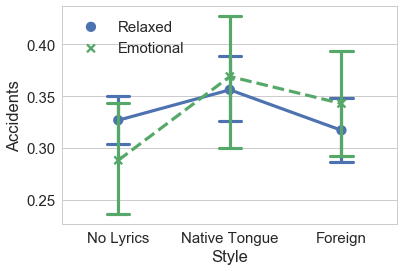

In [472]:
ax=sns.pointplot(x="Style", y="Accidents", hue="NeuroticismLevel",
data=Neuroticism,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Relaxed', 'Emotional'])
plt.savefig('Style_Accidents_Neuroticism.jpg')

In [141]:
data01

,Mother tongue,NoLyricsLike,ForeignLike,FamiliarLike,ActiveEngagement,PerceptualAbilities,MusicalTraining,SingingAbilities,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Timestamp,,,,,,,,,,,,,,,
0,French,1,1,1,51,52,29,12,41,67,79,92,79,76,66
1,French,6,4,4,56,58,45,41,33,111,44,38,85,42,79
2,Spanish,4,1,7,37,43,24,31,31,79,34,79,85,69,24
3,Persian,2,1,5,36,53,27,42,27,86,62,85,66,76,50
4,Spanish,5,7,3,45,38,18,32,39,83,73,95,79,60,79
5,French,5,3,5,50,53,25,26,35,71,46,73,66,52,85
6,French,4,5,3,46,55,34,32,36,91,28,73,73,85,16
7,French,2,5,6,51,54,39,32,37,96,52,24,79,60,16
8,French,5,4,5,55,55,40,35,41,102,66,34,88,85,52


In [473]:
data.to_csv('out.csv')